In [1]:
# Importing the libraries we're going to need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# this allows plots to appear directly in the notebook
%matplotlib inline

In [3]:
# Let's setup our fuel consumption data from 2010 to july 2017
fuel = pd.read_csv('Fuel Efficiciency/Fuel_FO_2010-17_lr.csv', sep = ';',index_col=None,encoding='latin-1')
fuel.head(5)

,IN,Train_Bulletin,Sector,DateTime1,Id_Loc,Track_id,Id_Engineer,Id_fireman,Hours,Kilometers,...,id_Type,Type,Traccion,Direction,Id_Model_Loc,Model_Loc,UTC,GTK_T,Net_Ton_Km,Liters_r
0,TREN,32175,N,26/4/2017,5409,1,67.0,252.0,4.63,56.1,...,1,CARGA,S,0,38,GE U20C,UTR,35628557.1,56.1,100.0
1,TREN,32177,N,26/4/2017,11,1,104.0,285.0,2.25,35.1,...,1,CARGA,S,1,9,GE U10B,UTR,21194784.0,14995773.0,100.0
2,TREN,32178,N,26/4/2017,5409,1,67.0,252.0,3.08,56.1,...,1,CARGA,S,1,38,GE U20C,UTR,83729250.0,58905000.0,200.0
3,TREN,32187,N,27/4/2017,6931,1,18.0,286.0,1.75,35.1,...,1,CARGA,S,1,43,HM,UTR,20671794.0,14546844.0,50.0
4,TREN,32188,N,27/4/2017,21,1,72.0,91.0,3.33,56.1,...,1,CARGA,S,0,28,GM,UTR,27692100.0,0.0,100.0


In [4]:
# Let's use all the data again
f= fuel
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)
f['GTK_9'] = ((f['Gross_Ton_km'] / 1000000000)).astype(float)
# create six dummy variables for track_id using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Track_id, prefix='SD').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)

# create six dummy variables for Locomotive Type using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Id_Model_Loc, prefix='MOD').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)


# create six dummy variables for Train Type using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Id_Sub_Type, prefix='TRN').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)

# create a new Series called Tract - Number of Locomotives
f['Tract'] = f.Traccion.map({'S':1,'M':0})

# create a new Series called IsUnit
f['IsUnit'] = f.UTC.map({'UTR':1,'NUT':0,'PAS':-1})

f.head()

,IN,Train_Bulletin,Sector,DateTime1,Id_Loc,Track_id,Id_Engineer,Id_fireman,Hours,Kilometers,...,TRN_3,TRN_4,TRN_5,TRN_6,TRN_8,TRN_9,TRN_10,TRN_11,Tract,IsUnit
0,TREN,32175,N,26/4/2017,5409,1,67.0,252.0,4.63,56.1,...,0,0,0,0,0,0,0,0,1,1
1,TREN,32177,N,26/4/2017,11,1,104.0,285.0,2.25,35.1,...,0,0,0,0,0,0,0,0,1,1
2,TREN,32178,N,26/4/2017,5409,1,67.0,252.0,3.08,56.1,...,0,0,0,0,0,0,0,0,1,1
3,TREN,32187,N,27/4/2017,6931,1,18.0,286.0,1.75,35.1,...,0,0,0,0,0,0,0,0,1,1
4,TREN,32188,N,27/4/2017,21,1,72.0,91.0,3.33,56.1,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
#f.dtypes

In [5]:
# import other necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

C:\Users\225648\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
#choose the predictor columns (X) with all the predictors and the dependent variable (y) Liters
#feature_cols = ['GTK_9', 'Hours', 'Kilometers', 'IsUnit', 'Tract','SD_2', 'SD_3', 'SD_4', 'SD_5', 'SD_6', 
#                'MOD_10', 'MOD_28', 'MOD_38', 'MOD_40', 'MOD_42', 'MOD_43', 
#                'TRN_2', 'TRN_3', 'TRN_4', 'TRN_5', 'TRN_6', 'TRN_8', 'TRN_9', 'TRN_10', 'TRN_11']

feature_cols = ['GTK_9', 'Hours', 'Kilometers', 'IsUnit', 'Tract','SD_2', 'SD_3', 'SD_4', 'SD_6', 
                'MOD_38', 'MOD_40', 'MOD_42', 
                'TRN_2', 'TRN_3', 'TRN_4', 'TRN_6', 'TRN_8', 'TRN_9', 'TRN_11']
X = f[feature_cols]
y = f.Liters


In [7]:
# Separate train and test set
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.33, random_state = 5)


In [8]:
# This creates a LinearRegression object with all the variables
lm = LinearRegression()
regr = lm.fit(X_train, Y_train)

# print coefficients
#list(zip(feature_cols, lm.coef_))

In [9]:
# Import regression modules
# ols - stands for Ordinary least squares
import statsmodels.api as sm
from statsmodels.formula.api import ols

# The thing inside the "quotes" is called a formula
#m = ols('Y_test ~ GTK_9 + Hours + Kilometers + IsUnit + Tract + SD_2 + SD_3 + SD_4 + SD_5 + SD_6 + MOD_10 + MOD_28 + MOD_38 + MOD_40 + MOD_42 + MOD_43 + TRN_2 + TRN_3 + TRN_4 + TRN_5 + TRN_6 + TRN_8 + TRN_9 + TRN_10 + TRN_11 ',X_test).fit()

m = ols('Y_test ~ GTK_9 + Hours + Kilometers + IsUnit + Tract + SD_2 + SD_3 + SD_4 + SD_6 + MOD_38 + MOD_40 + MOD_42 + TRN_2 + TRN_3 + TRN_4 + TRN_6 + TRN_8 + TRN_9 + TRN_11 ',X_test).fit()
#print (m.summary())

In [10]:
D_T = len(feature_cols)  
Y_pred_train = regr.predict(X_train[list(feature_cols)]) 
# We calculate the RSS with respect to the training data
RSS_TRAIN_T = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_T = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_T = len(X_train)   
RSE_TRAIN_T = ((RSS_TRAIN_T/(N_TRAIN_T-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = regr.predict(X_test[list(feature_cols)]) 
RSS_TEST_T = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_T = ((Y_test - Y_test.mean()) ** 2).sum()    
N_TEST_T = len(X_test)  
RSE_TEST_T = ((RSS_TEST_T/(N_TEST_T-2)) ** 0.5)
   
MSE_TRAIN_T = mean_squared_error(Y_train, (Y_pred_train))    
MSE_TEST_T = mean_squared_error(Y_test, (Y_pred_test))

R2s_TRAIN_T = r2_score(Y_train, (Y_pred_train))
R2s_TEST_T = r2_score(Y_test, (Y_pred_test))    
    
print("OLS Tot Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_T, RSS_TEST_T))
print("OLS Tot Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_T, TSS_TEST_T))
print("OLS Tot Training R2: {0:6.1f}% Test R2: {1:6.1f}%".format ((R2s_TRAIN_T*100), (R2s_TEST_T*100)))   
print("OLS Tot Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_T, MSE_TEST_T))    
print("OLS Tot Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_T, RSE_TEST_T))    
print("OLS Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} Total Q: {3:6d}".format (D_T,N_TRAIN_T,N_TEST_T,N_TRAIN_T+N_TEST_T))

OLS Tot Training RSS: 4024317021.43 Test RSS: 2034299804.18
OLS Tot Training TSS: 13169535785.92 Test TSS: 6560753475.39
OLS Tot Training R2:   69.4% Test R2:   69.0%
OLS Tot Training MSE: 66754.86 Test MSE: 68508.78
OLS Tot Training RSE: 258.37 Test RSE: 261.75
OLS Coeffients:     19 Train Q:  60285 Test Q:  29694 Total Q:  89979


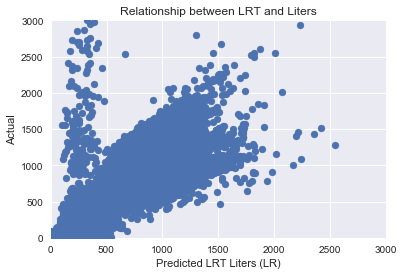

In [11]:
# Is the relationship linear
plt.scatter(Y_pred_test, Y_test)
plt.xlim( 0, 3000 ) 
plt.ylim( 0, 3000 ) 
plt.xlabel("Predicted LRT Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between LRT and Liters")

We can perform best subset selection by identifying the best model that contains a given number of predictors, where **best** is quantified using RSS. We'll define a helper function to outputs the best set of variables for
each model size:

In [12]:
# The following four functions are a python adaptation of ISL p. 248-251 by R. Jordan Crouser at Smith College found in:
#http://www.science.smith.edu/~jcrouser/SDS293/labs/lab9/Lab%209%20-%20Subset%20Selection%20in%20Python.pdf
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    
# Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
# We calculate the RSS with respect to the test data
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    
    return {"model":regr, "RSS":RSS}



# Forward Stepwise Selection
We can also use a similar approach to perform forward stepwise
or backward stepwise selection, using a slight modification of the functions we defined above:

In [13]:
def forward(predictors, X_train, y_train, X_test, y_test):
    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    toc = time.time()
#    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
          # Return the best model, along with some other useful information about the model
    return best_model


In [14]:
modelf_train = pd.DataFrame(columns=["RSS", "model"])
tic = time.time()
predictors = []
for i in range(1,len(X_train.columns)+1):
#    modelf_train.loc[i] = forward(predictors, X[train], y[train]["Liters"], X[test], y[test]["Liters"])
    modelf_train.loc[i] = forward(predictors, X_train, Y_train, X_test, Y_test)
    predictors = modelf_train.loc[i]["model"].model.exog_names
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Total elapsed time: 16.975433826446533 seconds.


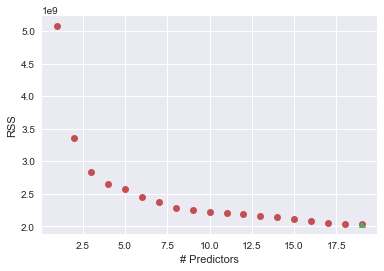

In [15]:
plt.plot(modelf_train["RSS"], "or")
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(modelf_train["RSS"].argmin(), modelf_train["RSS"].min(), "g^")

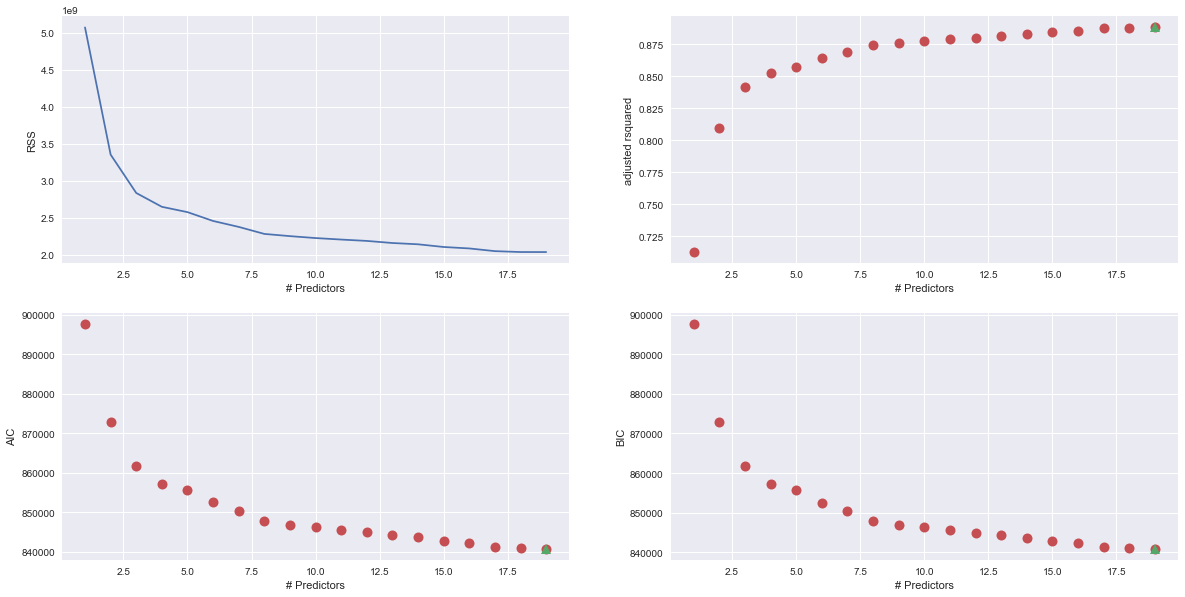

In [16]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot the line of RSS which monotonically decreases as Predictors Increase

plt.plot(modelf_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
rsquared = modelf_train.apply(lambda row: row[1].rsquared, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared, "or")
plt.plot(rsquared.argmax(), rsquared.max(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic

aic = modelf_train.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic, "or")
plt.plot(aic.argmin(), aic.min(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('AIC')
bic = modelf_train.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic, "or")
plt.plot(bic.argmin(), bic.min(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [17]:
D_T_F = min([rsquared.argmax(), aic.argmin(), bic.argmin()])
feature_cols_F = list(modelf_train.loc[D_T_F, "model"].model.exog_names)

# We calculate the RSS with respect to the training data
Y_pred_train = modelf_train.loc[D_T_F, "model"].predict(X_train[feature_cols_F])
RSS_TRAIN_F = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_F = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_F = len(X_train)   
RSE_TRAIN_F = ((RSS_TRAIN_F/(N_TRAIN_F-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = modelf_train.loc[D_T_F, "model"].predict(X_test[feature_cols_F])
RSS_TEST_F = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_F = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_F = len(X_test)  
RSE_TEST_F = ((RSS_TEST_F/(N_TEST_F-2)) ** 0.5)
   
MSE_TRAIN_F = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_F = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_F = r2_score(Y_train, Y_pred_train) 
R2s_TEST_F = r2_score(Y_test, Y_pred_test) 

R2_TRAIN_F = modelf_train.loc[D_T_F, "model"].rsquared
MSEr_TRAIN_F = modelf_train.loc[D_T_F, "model"].mse_resid
#R2_TEST_F = r2_score(Y_test, Y_pred_test) 

print("OLS Fwd Training R2: {0:6.1f}% ".format ((R2_TRAIN_F*100)))  
print("OLS Fwd Training MSE_resid: {0:6.2f} ".format ((MSEr_TRAIN_F)))  
print("OLS Fwd Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_F, RSS_TEST_F))
print("OLS Fwd Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_F, TSS_TEST_F))
print("OLS Fwd Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_F*100), (R2s_TEST_F*100)))   

#print("OLS Fwd Training R2: {0:6.1f}% Test R2: {1:6.1f}%".format (((1-(RSS_TRAIN_F/TSS_TRAIN_F))*100), ((1-(RSS_TEST_F/TSS_TEST_F))*100)))   
print("OLS Fwd Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_F, MSE_TEST_F))    
print("OLS Fwd Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_F, RSE_TEST_F))    
print("OLS Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} Total Q: {3:6d}".format (D_T_F,N_TRAIN_F,N_TEST_F,N_TRAIN_F+N_TEST_F))

OLS Fwd Training R2:   88.8% 
OLS Fwd Training MSE_resid: 66780.10 
OLS Fwd Training RSS: 4024569783.62 Test RSS: 2034548640.41
OLS Fwd Training TSS: 13169535785.92 Test TSS: 6560753475.39
OLS Fwd Training R2s:   69.4% Test R2s:   69.0%
OLS Fwd Training MSE: 66759.06 Test MSE: 68517.16
OLS Fwd Training RSE: 258.38 Test RSE: 261.77
OLS Coeffients:     19 Train Q:  60285 Test Q:  29694 Total Q:  89979


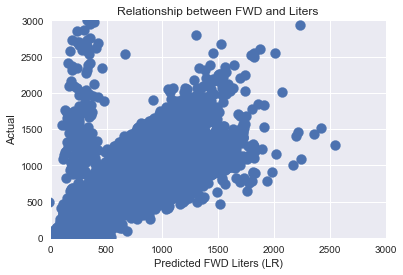

In [18]:
# Is the relationship linear
plt.scatter(Y_pred_test, Y_test)
plt.xlim( 0, 3000 ) 
plt.ylim( 0, 3000 ) 
plt.xlabel("Predicted FWD Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between FWD and Liters")

In [19]:
#print(modelf_train.loc[19, "model"].mse_resid)
#print(modelf_train.loc[19, "model"].mse_total)

# Backward Stepwise Selection
We can also use a similar approach to perform backward stepwise selection:

In [20]:
def backward(predictors, X_train, y_train, X_test, y_test):
    tic = time.time()
    results = []
    for combo in itertools.combinations(predictors, len(predictors)-1):
        #results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
        results.append(processSubset (combo, X_train, y_train, X_test, y_test))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    toc = time.time()
#    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.") 
    # Return the best model, along with some other useful information about the model
    return best_model




In [21]:
modelb_train = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X_train.columns)))
tic = time.time()
predictors = X_train.columns
while(len(predictors) > 1):
    modelb_train.loc[len(predictors)-1] = backward(predictors, X_train, Y_train, X_test, Y_test)
    predictors = modelb_train.loc[len(predictors)-1]["model"].model.exog_names
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")


Total elapsed time: 29.187245845794678 seconds.


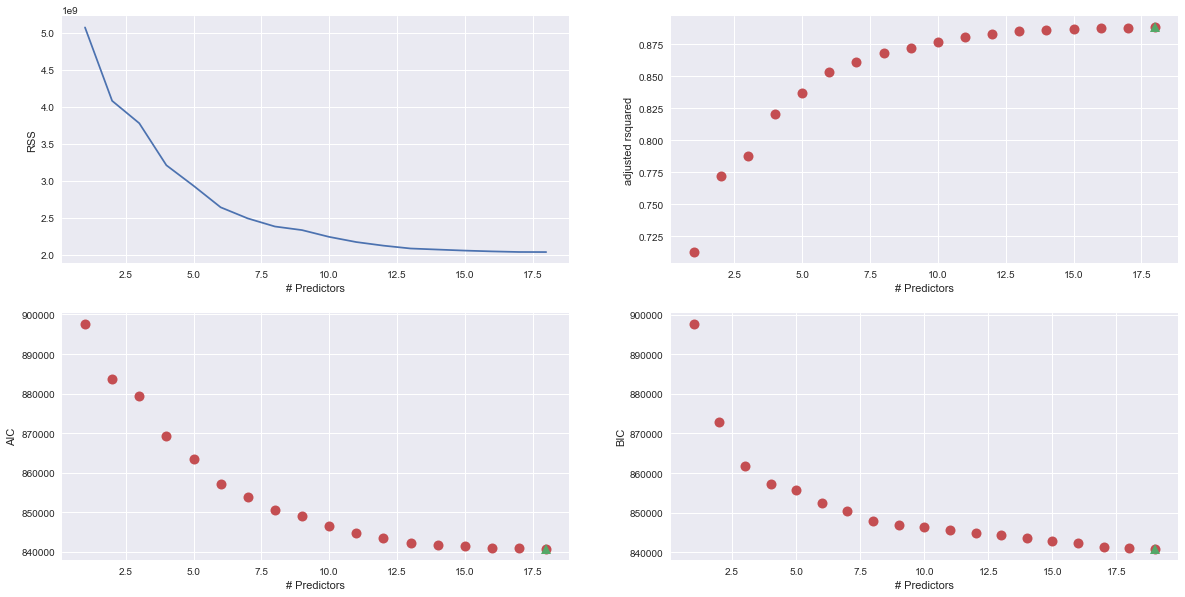

In [22]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot the line of RSS which monotonically decreases as Predictors Increase

plt.plot(modelb_train["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
rsquared = modelb_train.apply(lambda row: row[1].rsquared, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared, "or")
plt.plot(rsquared.argmax(), rsquared.max(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic

aic = modelb_train.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic, "or")
plt.plot(aic.argmin(), aic.min(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('AIC')
bic = modelf_train.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic, "or")
plt.plot(bic.argmin(), bic.min(), "g^")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [23]:
D_T_B = min([rsquared.argmax(), aic.argmin(), bic.argmin()])
feature_cols_B = list(modelb_train.loc[D_T_B, "model"].model.exog_names)

# We calculate the RSS with respect to the training data
Y_pred_train = modelb_train.loc[D_T_B, "model"].predict(X_train[feature_cols_B])
RSS_TRAIN_B = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_B = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_B = len(X_train)   
RSE_TRAIN_B = ((RSS_TRAIN_B/(N_TRAIN_B-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = modelb_train.loc[D_T_B, "model"].predict(X_test[feature_cols_B])
RSS_TEST_B = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_B = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_B = len(X_test)  
RSE_TEST_B = ((RSS_TEST_B/(N_TEST_B-2)) ** 0.5)
   
MSE_TRAIN_B = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_B = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_B = r2_score(Y_train, Y_pred_train) 
R2s_TEST_B = r2_score(Y_test, Y_pred_test) 

R2_TRAIN_B = modelb_train.loc[D_T_B, "model"].rsquared
MSEr_TRAIN_B = modelb_train.loc[D_T_B, "model"].mse_resid
#R2_TEST_B = r2_score(Y_test, Y_pred_test) 

print("OLS Bwd Training R2: {0:6.1f}% ".format ((R2_TRAIN_B*100)))  
print("OLS Bwd Training MSE_resid: {0:6.2f} ".format ((MSEr_TRAIN_B)))  
print("OLS Bwd Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_B, RSS_TEST_B))
print("OLS Bwd Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_B, TSS_TEST_B))
print("OLS Bwd Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_B*100), (R2s_TEST_B*100)))   

#print("OLS Bwd Training R2: {0:6.1f}% Test R2: {1:6.1f}%".format (((1-(RSS_TRAIN_B/TSS_TRAIN_B))*100), ((1-(RSS_TEST_B/TSS_TEST_B))*100)))   
print("OLS Bwd Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_B, MSE_TEST_B))    
print("OLS Bwd Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_B, RSE_TEST_B))    
print("OLS Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} Total Q: {3:6d}".format (D_T_B,N_TRAIN_B,N_TEST_B,N_TRAIN_B+N_TEST_B))

OLS Bwd Training R2:   88.8% 
OLS Bwd Training MSE_resid: 66827.38 
OLS Bwd Training RSS: 4027485734.27 Test RSS: 2034879368.50
OLS Bwd Training TSS: 13169535785.92 Test TSS: 6560753475.39
OLS Bwd Training R2s:   69.4% Test R2s:   69.0%
OLS Bwd Training MSE: 66807.43 Test MSE: 68528.30
OLS Bwd Training RSE: 258.48 Test RSE: 261.79
OLS Coeffients:     18 Train Q:  60285 Test Q:  29694 Total Q:  89979


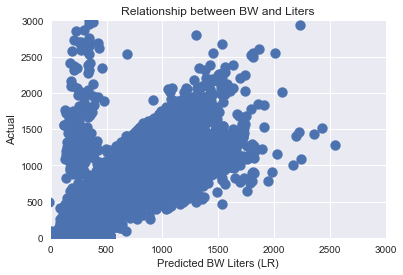

In [24]:
# Is the relationship linear
plt.scatter(Y_pred_test, Y_test)
plt.xlim( 0, 3000 ) 
plt.ylim( 0, 3000 ) 
plt.xlabel("Predicted BW Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between BW and Liters")

In [25]:
#print(models2.loc[19, "model"].summary())
#print(modelf_train.loc[19, "model"].summary())

In [108]:
feature_y_cols = ['Liters', 'GTK_9', 'Hours', 'Kilometers', 'IsUnit', 'Tract','SD_2', 'SD_3', 'SD_4', 'SD_6', 'MOD_38', 'MOD_40', 'MOD_42', 'TRN_2', 'TRN_3', 'TRN_4', 'TRN_6', 'TRN_8', 'TRN_9', 'TRN_11']
coef= fuel[feature_y_cols]

KeyError: "['IsUnit' 'Tract' 'SD_2' 'SD_3' 'SD_4' 'SD_6' 'MOD_38' 'MOD_40' 'MOD_42'\n 'TRN_2' 'TRN_3' 'TRN_4' 'TRN_6' 'TRN_8' 'TRN_9' 'TRN_11'] not in index"

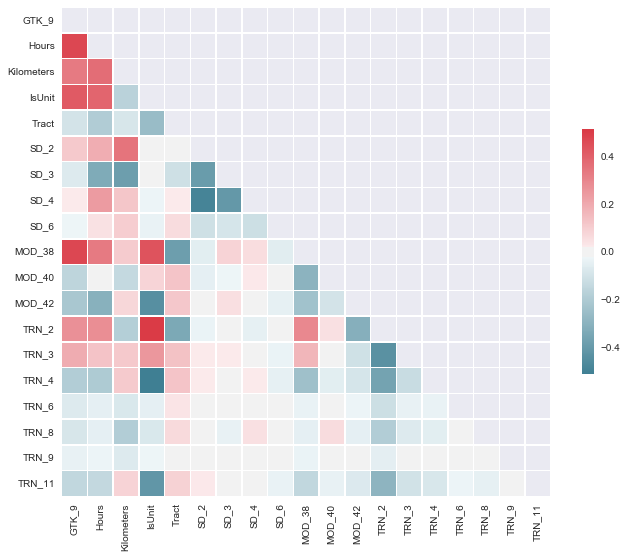

In [104]:
# Compute the correlation matrix
corr = coef.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f_, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Model selection using Cross-Validation

Now let's try to choose among the models of different sizes using cross-validation.
This approach is somewhat involved, as we must perform forward selection within each of the $k$ training sets. Despite this, we see that
with its clever subsetting syntax, ${\tt python}$ makes this job quite easy. First, we
create a vector that assigns each observation to one of $k = 10$ folds, and
we create a DataFrame in which we will store the results:

In order for the validation set approach to yield accurate estimates of the test
error, we must use *only the training observations* to perform all aspects of
model-fitting — including variable selection. Therefore, the determination of
which model of a given size is best must be made using *only the training
observations*. This point is subtle but important. If the full data set is used
to perform the best subset selection step, the validation set errors and
cross-validation errors that we obtain will not be accurate estimates of the
test error.

In [28]:
k=10        # number of folds
np.random.seed(seed=1)
folds = np.random.choice(k, size = len(Y_train), replace = True)

# Create a DataFrame to store the results of our upcoming calculations
cv_errors = pd.DataFrame(columns=range(1,k+1), index=range(1,26))
cv_errors = cv_errors.fillna(0)
#cv_errors

In [29]:
models_cv = pd.DataFrame(columns=["RSS", "model"])


# Outer loop iterates over all folds
for j in range(1,k+1):

    # Reset predictors
    predictors = []
    
    # Inner loop iterates over each size i
    for i in range(1,len(X.columns)+1):    
    
        # The perform forward selection on the full dataset minus the jth fold, test on jth fold

#        models_cv.loc[i] = forward(predictors, X_train[folds != (j-1)], Y_train[folds != (j-1)], X_train[folds == (j-1)], Y_train[folds == (j-1)])


        models_cv.loc[i] = forward(predictors, X_train[folds != (j-1)], Y_train[folds != (j-1)], X_test, Y_test)

        # Save the cross-validated error for this fold
        cv_errors[j][i] = models_cv.loc[i]["RSS"]

        # Extract the predictors
        predictors = models_cv.loc[i]["model"].model.exog_names
        #predictors = models_cv.loc[i]["model"].model.exog_names        

In [30]:
#cv_errors

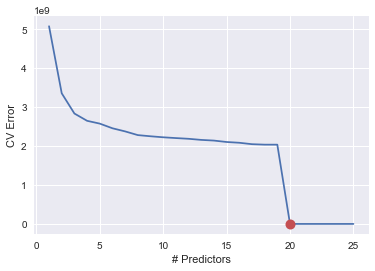

In [31]:
cv_mean = cv_errors.apply(np.mean, axis=1)

plt.plot(cv_mean)
plt.xlabel('# Predictors')
plt.ylabel('CV Error')
plt.plot(cv_mean.argmin(), cv_mean.min(), "or")

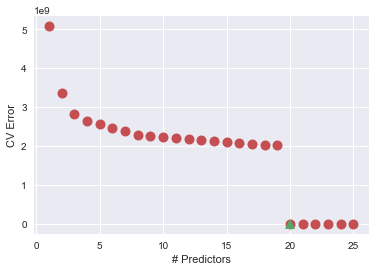

In [32]:
cv_mean = cv_errors.apply(np.mean, axis=1)

#plt.plot(cv_mean)
plt.xlabel('# Predictors')
plt.ylabel('CV Error')
plt.plot(cv_mean, "or")
plt.plot(cv_mean.argmin(), cv_mean.min(),  "g^")


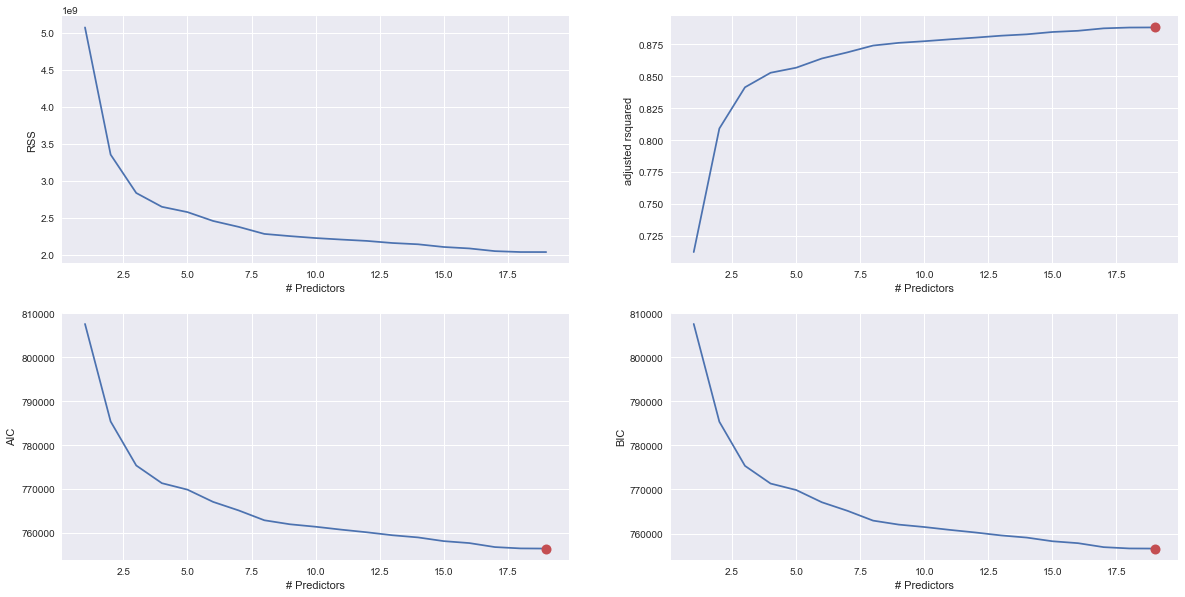

In [33]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_cv["RSS"])
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
rsquared = models_cv.apply(lambda row: row[1].rsquared, axis=1)
plt.subplot(2, 2, 2)
plt.plot(rsquared)
plt.plot(rsquared.argmax(), rsquared.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic

aic = models_cv.apply(lambda row: row[1].aic, axis=1)

plt.subplot(2, 2, 3)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('AIC')

bic = models_cv.apply(lambda row: row[1].bic, axis=1)
plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [35]:
# In this case the forward or backward stepwise give the same predictors
print(modelf_train.loc[19, "model"].summary())
#print(modelb_train.loc[18, "model"].summary())
print(models_cv.loc[19, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                 Liters   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 2.515e+04
Date:                Sat, 26 Aug 2017   Prob (F-statistic):               0.00
Time:                        22:51:12   Log-Likelihood:            -4.2039e+05
No. Observations:               60285   AIC:                         8.408e+05
Df Residuals:                   60266   BIC:                         8.410e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GTK_9       2016.0472     10.646    189.364      0.0

In [36]:
D_T_CV = min([rsquared.argmax(), aic.argmin(), bic.argmin()])
feature_cols_CV = list(models_cv.loc[D_T_CV, "model"].model.exog_names)

# We calculate the RSS with respect to the training data
Y_pred_train = models_cv.loc[D_T_CV, "model"].predict(X_train[feature_cols_CV])
RSS_TRAIN_CV = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_CV = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_CV = len(X_train)   
RSE_TRAIN_CV = ((RSS_TRAIN_CV/(N_TRAIN_CV-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = models_cv.loc[D_T_CV, "model"].predict(X_test[feature_cols_CV])
RSS_TEST_CV = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_CV = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_CV = len(X_test)  
RSE_TEST_CV = ((RSS_TEST_CV/(N_TEST_CV-2)) ** 0.5)
   
MSE_TRAIN_CV = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_CV = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_CV = r2_score(Y_train, Y_pred_train) 
R2s_TEST_CV = r2_score(Y_test, Y_pred_test) 

R2_TRAIN_CV = models_cv.loc[D_T_CV, "model"].rsquared
MSEr_TRAIN_CV = models_cv.loc[D_T_CV, "model"].mse_resid
#R2_TEST_CV = r2_score(Y_test, Y_pred_test) 

print("OLS CV Training R2: {0:6.1f}% ".format ((R2_TRAIN_CV*100)))  
print("OLS CV Training MSE_resid: {0:6.2f} ".format ((MSEr_TRAIN_CV)))  
print("OLS CV Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_CV, RSS_TEST_CV))
print("OLS CV Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_CV, TSS_TEST_CV))
print("OLS CV Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_CV*100), (R2s_TEST_CV*100)))   

#print("OLS CV Training R2: {0:6.1f}% Test R2: {1:6.1f}%".format (((1-(RSS_TRAIN_CV/TSS_TRAIN_CV))*100), ((1-(RSS_TEST_CV/TSS_TEST_CV))*100)))   
print("OLS CV Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_CV, MSE_TEST_CV))    
print("OLS CV Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_CV, RSE_TEST_CV))    
print("OLS Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} Total Q: {3:6d}".format (D_T_CV,N_TRAIN_CV,N_TEST_CV,N_TRAIN_CV+N_TEST_CV))

OLS CV Training R2:   88.8% 
OLS CV Training MSE_resid: 66537.62 
OLS CV Training RSS: 4024745970.25 Test RSS: 2034503715.61
OLS CV Training TSS: 13169535785.92 Test TSS: 6560753475.39
OLS CV Training R2s:   69.4% Test R2s:   69.0%
OLS CV Training MSE: 66761.98 Test MSE: 68515.65
OLS CV Training RSE: 258.39 Test RSE: 261.76
OLS Coeffients:     19 Train Q:  60285 Test Q:  29694 Total Q:  89979


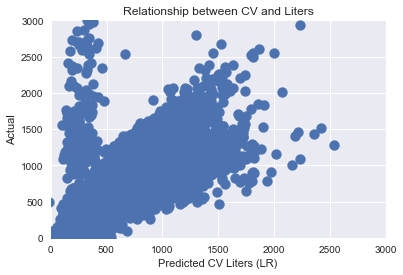

In [37]:
# Is the relationship linear
plt.scatter(Y_pred_test, Y_test)
plt.xlim( 0, 3000 ) 
plt.ylim( 0, 3000 ) 
plt.xlabel("Predicted CV Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between CV and Liters")

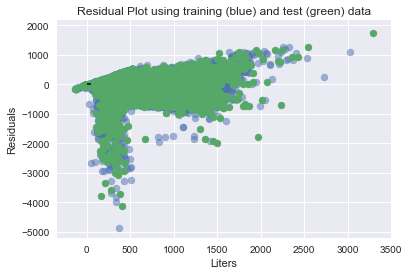

In [38]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=50, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=50)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.xlabel('Liters')

These funcitons on Ridge Regression and the Lasso is a Python adaptation of p. 251-255 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. Adapted by R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016).

# Ridge Regression
The ${\tt Ridge()}$ function has an alpha argument ($\lambda$, but with a different name!) that is used to tune the model. We'll generate an array of alpha values ranging from very big to very small, essentially
covering the full range of scenarios from the null model containing
only the intercept, to the least squares fit:

In [39]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [40]:
alphas = 10**np.linspace(10,-2,100)*0.5
#alphas

Associated with each alpha value is a vector of ridge regression coefficients, which we'll
store in a matrix ${\tt coefs}$. In this case, it is a $25 \times 100$
matrix, with 25 rows (one for each predictor) and 100
columns (one for each value of alpha). Remember that we'll want to standardize the
variables so that they are on the same scale. To do this, we can use the
${\tt normalize=True}$ parameter:

In [41]:
ridge = Ridge(normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 19)

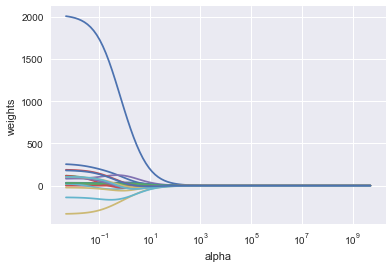

In [42]:
# As the alpha grows we expect the estimates are much lower
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [43]:
ridge2 = Ridge(alpha=4, normalize=True)
ridge2.fit(X_train, Y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
#print(pd.Series(ridge2.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(Y_test, pred2))        # Calculate the test MSE

137398.389861


The test MSE when alpha = 4 is 133970. Now let's see what happens if we use a huge value of alpha, say $10^{10}$:

In [44]:
ridge3 = Ridge(alpha=10**10, normalize=True)
ridge3.fit(X_train, Y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
#print(pd.Series(ridge3.coef_, index=X.columns)) # Print coefficients
print(mean_squared_error(Y_test, pred3))        # Calculate the test MSE

220945.491398


Instead of arbitrarily choosing alpha, it would be better to
use cross-validation to choose the tuning parameter alpha. We can do this using
the cross-validated ridge regression function, ${\tt RidgeCV()}$. By default, the function
performs generalized cross-validation (an efficient form of LOOCV), though this can be changed using the
argument ${\tt cv}$.

In [45]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(X_train, Y_train)
ridgecv.alpha_

0.0050000000000000001

In [46]:
ridge_alph = Ridge(alpha=ridgecv.alpha_, normalize=True)
ridge_alph.fit(X_train, Y_train)
mean_squared_error(Y_test, ridge_alph.predict(X_test))

68514.425324579483

This does not represent an improvement over the test MSE that we got using
alpha $ = 0.005$. Finally, we refit our ridge regression model on the full data set,
using the value of alpha chosen by cross-validation, and examine the coefficient
estimates.

In [47]:
# alpha 0.005
ridge_alph.fit(X_test, Y_test)
#pd.Series(ridge_alph.coef_, index=X_test.columns)

Ridge(alpha=0.0050000000000000001, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=True, random_state=None, solver='auto',
   tol=0.001)

In [48]:
D_T_RDG = len(X_test.columns)
feature_cols_RDG = list(X_test.columns)
mean_squared_error(Y_test, ridge_alph.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = ridge_alph.predict(X_train[feature_cols_RDG])
RSS_TRAIN_RDG = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_RDG = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_RDG = len(X_train)   
RSE_TRAIN_RDG = ((RSS_TRAIN_RDG/(N_TRAIN_RDG-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = ridge_alph.predict(X_test[feature_cols_RDG])
RSS_TEST_RDG = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_RDG = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_RDG = len(X_test)  
RSE_TEST_RDG = ((RSS_TEST_RDG/(N_TEST_RDG-2)) ** 0.5)
   
MSE_TRAIN_RDG = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_RDG = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_RDG = r2_score(Y_train, Y_pred_train) 
R2s_TEST_RDG = r2_score(Y_test, Y_pred_test) 

#R2_TRAIN_RDG = ridge_alph.rsquared
#MSEr_TRAIN_RDG = ridge_alph.mse_resid
#R2_TEST_RDG = r2_score(Y_test, Y_pred_test) 

#print("OLS ridge_alph Training R2: {0:6.1f}% ".format ((R2_TRAIN_RDG*100)))  
#print("OLS ridge_alph Training MSE_resid: {0:6.2f} ".format ((MSEr_TRAIN_RDG)))  
print("OLS ridge_alph Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_RDG, RSS_TEST_RDG))
print("OLS ridge_alph Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_RDG, TSS_TEST_RDG))
print("OLS ridge_alph Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_RDG*100), (R2s_TEST_RDG*100)))   

#print("OLS CV Training R2: {0:6.1f}% Test R2: {1:6.1f}%".format (((1-(RSS_TRAIN_RDG/TSS_TRAIN_RDG))*100), ((1-(RSS_TEST_RDG/TSS_TEST_RDG))*100)))   
print("OLS ridge_alph Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_RDG, MSE_TEST_RDG))    
print("OLS ridge_alph Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_RDG, RSE_TEST_RDG))    
print("OLS Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} Total Q: {3:6d}".format (D_T_RDG,N_TRAIN_RDG,N_TEST_RDG,N_TRAIN_RDG+N_TEST_RDG))

OLS ridge_alph Training RSS: 4029170147.15 Test RSS: 2032324179.11
OLS ridge_alph Training TSS: 13169535785.92 Test TSS: 6560753475.39
OLS ridge_alph Training R2s:   69.4% Test R2s:   69.0%
OLS ridge_alph Training MSE: 66835.37 Test MSE: 68442.25
OLS ridge_alph Training RSE: 258.53 Test RSE: 261.62
OLS Coeffients:     19 Train Q:  60285 Test Q:  29694 Total Q:  89979


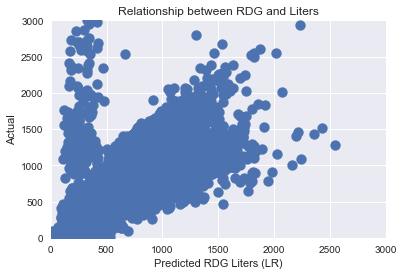

In [49]:
# Is the relationship linear
plt.scatter(Y_pred_test, Y_test)
plt.xlim( 0, 3000 ) 
plt.ylim( 0, 3000 ) 
plt.xlabel("Predicted RDG Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between RDG and Liters")


# The Lasso
We saw that ridge regression in this case even with a wise choice of alpha cannot outperform least
squares as well as the null model on fuel consumption data set. We now ask
whether the lasso can yield either a more accurate or a more interpretable
model than ridge regression. In order to fit a lasso model, we'll
use the ${\tt Lasso()}$ function; however, this time we'll need to include the argument ${\tt max_iter=10000}$.
Other than that change, we proceed just as we did in fitting a ridge model:

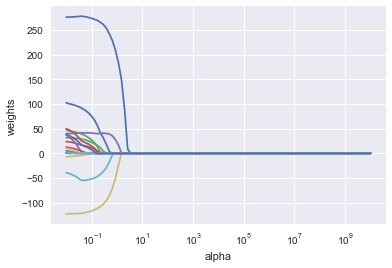

In [50]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), Y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

Notice that in the coefficient plot that depending on the choice of tuning
parameter, some of the coefficients are exactly equal to zero. We now
perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

In [51]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, Y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, Y_train)
mean_squared_error(Y_test, lasso.predict(X_test))

68505.788083029227

In [52]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

GTK_9         2016.823793
Hours            7.333342
Kilometers       0.288901
IsUnit          49.850033
Tract         -334.989864
SD_2            23.874143
SD_3           257.991569
SD_4           120.603967
SD_6           112.668675
MOD_38          80.285298
MOD_40         -24.185694
MOD_42        -141.519203
TRN_2            2.007608
TRN_3           -0.000000
TRN_4          187.594081
TRN_6           68.229320
TRN_8           76.313712
TRN_9           77.352601
TRN_11         175.083309
dtype: float64

In [53]:
D_T_LSS = len(X_test.columns[lasso.coef_ != 0])
feature_cols_LSS = list(X_test.columns)
mean_squared_error(Y_test, lasso.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = lasso.predict(X_train[feature_cols_LSS])
RSS_TRAIN_LSS = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_LSS = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_LSS = len(X_train)   
RSE_TRAIN_LSS = ((RSS_TRAIN_LSS/(N_TRAIN_LSS-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = lasso.predict(X_test[feature_cols_LSS])
RSS_TEST_LSS = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_LSS = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_LSS = len(X_test)  
RSE_TEST_LSS = ((RSS_TEST_LSS/(N_TEST_LSS-2)) ** 0.5)
   
MSE_TRAIN_LSS = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_LSS = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_LSS = r2_score(Y_train, Y_pred_train) 
R2s_TEST_LSS = r2_score(Y_test, Y_pred_test) 

#R2_TRAIN_LSS = lasso.rsquared
#MSEr_TRAIN_LSS = lasso.mse_resid
#R2_TEST_LSS = r2_score(Y_test, Y_pred_test) 

#print("OLS lasso Training R2: {0:6.1f}% ".format ((R2_TRAIN_LSS*100)))  
#print("OLS lasso Training MSE_resid: {0:6.2f} ".format ((MSEr_TRAIN_LSS)))  
print("OLS lasso Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_LSS, RSS_TEST_LSS))
print("OLS lasso Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_LSS, TSS_TEST_LSS))
print("OLS lasso Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_LSS*100), (R2s_TEST_LSS*100)))   

#print("OLS CV Training R2: {0:6.1f}% Test R2: {1:6.1f}%".format (((1-(RSS_TRAIN_LSS/TSS_TRAIN_LSS))*100), ((1-(RSS_TEST_LSS/TSS_TEST_LSS))*100)))   
print("OLS lasso Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_LSS, MSE_TEST_LSS))    
print("OLS lasso Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_LSS, RSE_TEST_LSS))    
print("OLS Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} Total Q: {3:6d}".format (D_T_LSS,N_TRAIN_LSS,N_TEST_LSS,N_TRAIN_LSS+N_TEST_LSS))

OLS lasso Training RSS: 4024720116.02 Test RSS: 2034210871.34
OLS lasso Training TSS: 13169535785.92 Test TSS: 6560753475.39
OLS lasso Training R2s:   69.4% Test R2s:   69.0%
OLS lasso Training MSE: 66761.55 Test MSE: 68505.79
OLS lasso Training RSE: 258.39 Test RSE: 261.74
OLS Coeffients:     18 Train Q:  60285 Test Q:  29694 Total Q:  89979


This is not lower than the test set MSE of the null model and of
least squares, and only a little worse than the test MSE of ridge regression with alpha
chosen by cross-validation.

However, the lasso could have a substantial advantage over ridge regression in
that the resulting coefficient estimates are sparse. Here we see that 2 of
the 25 coefficient estimates are exactly zero.  In this case it hasnt't, and neither the ridge or the lasso give us a better fit than the least squares with attribute selection:

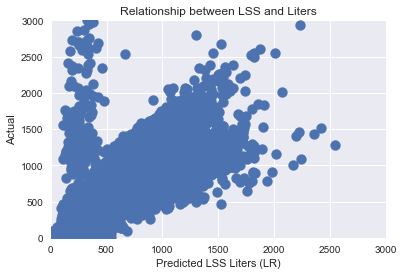

In [54]:
# Is the relationship linear
plt.scatter(Y_pred_test, Y_test)
plt.xlim( 0, 3000 ) 
plt.ylim( 0, 3000 ) 
plt.xlabel("Predicted LSS Liters (LR)")
plt.ylabel("Actual")
plt.title("Relationship between LSS and Liters")

# Fitting Regression Trees

This exercise on Decision Trees is a Python adaptation of p. 324-331 of "Introduction to Statistical Learning with
Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. Original adaptation by J. Warmenhoven, updated by R. Jordan Crouser at Smith
College for SDS293: Machine Learning (Spring 2016).

Now let's try fitting a **regression tree** to the ${\tt Fuel}$ data set. First, we use the
training set, and fit the tree to the training data using ${\tt Liters}$ (Fuel Consumption) as our response:

In [55]:
# Let's use all the data again
f= fuel
f['Lts_x_GTK'] = ((f['Liters'] * 1000)/ (f['Gross_Ton_km'] / 1000000)).astype(float)
f['GTK_9'] = ((f['Gross_Ton_km'] / 1000000000)).astype(float)
# create six dummy variables for track_id using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Track_id, prefix='SD').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)

# create six dummy variables for Locomotive Type using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Id_Model_Loc, prefix='MOD').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)


# create six dummy variables for Train Type using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(f.Id_Sub_Type, prefix='TRN').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
f = pd.concat([f, area_dummies], axis=1)

# create a new Series called Tract - Number of Locomotives
f['Tract'] = f.Traccion.map({'S':1,'M':0})

# create a new Series called IsUnit
f['IsUnit'] = f.UTC.map({'UTR':1,'NUT':0,'PAS':-1})


In [56]:

#choose the predictor columns (X) with 19 predictors and the dependent variable (y) Liters
X = f[feature_cols]
y = f.Liters


In [57]:
# Separate train and test set
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.33, random_state = 5)


In [58]:
import graphviz
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

In [59]:
# Pruning not supported. Choosing max depth 2)
dtr = DecisionTreeRegressor(max_depth=2)
dtr.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

Let's take a look at the tree:

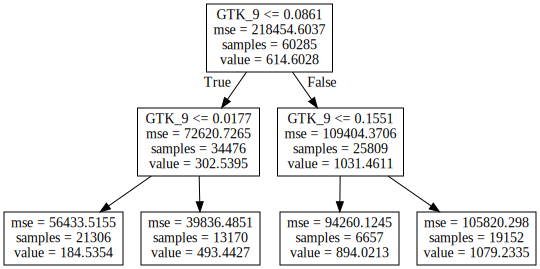

In [60]:
export_graphviz(dtr, out_file="mytree.dot", feature_names=X_train.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Now let's see how it does on the test data:

74379.822960461097

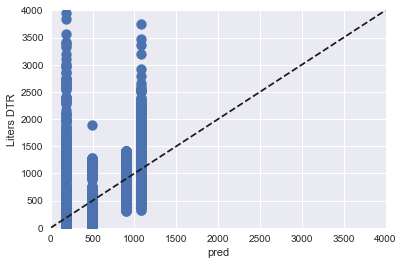

In [61]:
pred = dtr.predict(X_test)

plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters DTR')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [62]:
D_T_dtr = len(X_test.columns)
feature_cols_dtr = list(X_test.columns)
mean_squared_error(Y_test, dtr.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = dtr.predict(X_train[feature_cols_dtr])
RSS_TRAIN_dtr = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_dtr = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_dtr = len(X_train)   
RSE_TRAIN_dtr = ((RSS_TRAIN_dtr/(N_TRAIN_dtr-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = dtr.predict(X_test[feature_cols_dtr])
RSS_TEST_dtr = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_dtr = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_dtr = len(X_test)  
RSE_TEST_dtr = ((RSS_TEST_dtr/(N_TEST_dtr-2)) ** 0.5)
   
MSE_TRAIN_dtr = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_dtr = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_dtr = r2_score(Y_train, Y_pred_train) 
R2s_TEST_dtr = r2_score(Y_test, Y_pred_test) 


print("Tree dtr Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_dtr, RSS_TEST_dtr))
print("Tree dtr Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_dtr, TSS_TEST_dtr))
print("Tree dtr Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_dtr*100), (R2s_TEST_dtr*100)))   

  
print("Tree dtr Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_dtr, MSE_TEST_dtr))    
print("Tree dtr Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_dtr, RSE_TEST_dtr))    
print("Tree Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} Total Q: {3:6d}".format (D_T_dtr,N_TRAIN_dtr,N_TEST_dtr,N_TRAIN_dtr+N_TEST_dtr))

Tree dtr Training RSS: 4381178987.79 Test RSS: 2208634462.99
Tree dtr Training TSS: 13169535785.92 Test TSS: 6560753475.39
Tree dtr Training R2s:   66.7% Test R2s:   66.3%
Tree dtr Training MSE: 72674.45 Test MSE: 74379.82
Tree dtr Training RSE: 269.59 Test RSE: 272.74
Tree Coeffients:     19 Train Q:  60285 Test Q:  29694 Total Q:  89979


The test set MSE associated with the regression tree is
74379. The square root of the MSE is therefore around 272.7, indicating
that this model leads to test predictions that are within around 270 liters of
the true fuel for the train.
    
# 8.3.3 Bagging and Random Forests

Let's see if we can improve on this result using **bagging** and **random forests**. The exact results obtained in this section may
depend on the version of ${\tt python}$ and the version of the ${\tt RandomForestRegressor}$ package
installed on your computer, so don't stress out if you don't match up exactly with the book. Recall that **bagging** is simply a special case of
a **random forest** with $m = p$. Therefore, the ${\tt RandomForestRegressor()}$ function can
be used to perform both random forests and bagging. Let's start with bagging:

In [64]:
# Bagging: using all features
bagging = RandomForestRegressor(max_features=19, random_state=1)
bagging.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=19, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

The argument ${\tt max\_features=19}$ indicates that all 19 predictors should be considered
for each split of the tree -- in other words, that bagging should be done. How
well does this bagged model perform on the test set?

60659.047587251567

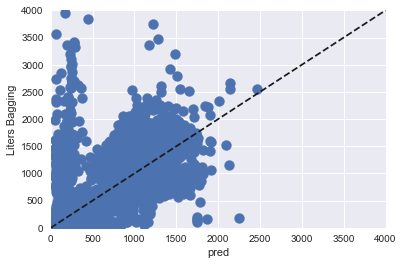

In [65]:
pred = bagging.predict(X_test)
plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters Bagging')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [66]:
D_T_bagging = len(X_test.columns)
feature_cols_bagging = list(X_test.columns)
mean_squared_error(Y_test, bagging.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = bagging.predict(X_train[feature_cols_bagging])
RSS_TRAIN_bagging = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_bagging = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_bagging = len(X_train)   
RSE_TRAIN_bagging = ((RSS_TRAIN_bagging/(N_TRAIN_bagging-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = bagging.predict(X_test[feature_cols_bagging])
RSS_TEST_bagging = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_bagging = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_bagging = len(X_test)  
RSE_TEST_bagging = ((RSS_TEST_bagging/(N_TEST_bagging-2)) ** 0.5)
   
MSE_TRAIN_bagging = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_bagging = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_bagging = r2_score(Y_train, Y_pred_train) 
R2s_TEST_bagging = r2_score(Y_test, Y_pred_test) 


print("Tree bagging Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_bagging, RSS_TEST_bagging))
print("Tree bagging Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_bagging, TSS_TEST_bagging))
print("Tree bagging Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_bagging*100), (R2s_TEST_bagging*100)))   

  
print("Tree bagging Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_bagging, MSE_TEST_bagging))    
print("Tree bagging Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_bagging, RSE_TEST_bagging))    
print("Tree Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} Total Q: {3:6d}".format (D_T_bagging,N_TRAIN_bagging,N_TEST_bagging,N_TRAIN_bagging+N_TEST_bagging))

Tree bagging Training RSS: 1279781636.32 Test RSS: 1801209759.06
Tree bagging Training TSS: 13169535785.92 Test TSS: 6560753475.39
Tree bagging Training R2s:   90.3% Test R2s:   72.5%
Tree bagging Training MSE: 21228.86 Test MSE: 60659.05
Tree bagging Training RSE: 145.70 Test RSE: 246.30
Tree Coeffients:     19 Train Q:  60285 Test Q:  29694 Total Q:  89979


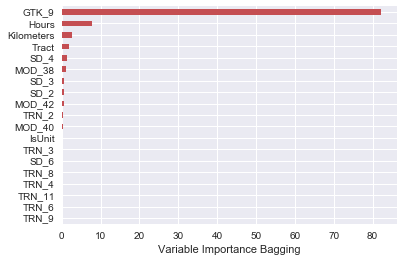

In [67]:
Importance = pd.DataFrame({'Importance':bagging.feature_importances_*100}, index=X.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance Bagging')
plt.gca().legend_ = None

We can grow a random forest in exactly the same way, except that
we'll use a smaller value of the ${\tt max\_features}$ argument. Here we'll
use ${\tt max\_features = 6}$:

In [68]:
# Random forests: using 6 features
rd_ft = RandomForestRegressor(max_features=6, random_state=1)
rd_ft.fit(X_train, Y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

59831.319426896058

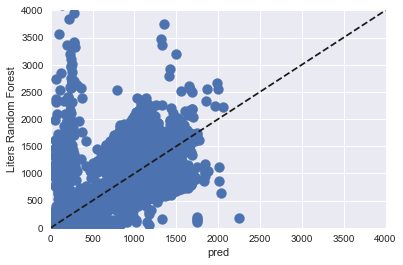

In [69]:
pred = rd_ft.predict(X_test)
plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters Random Forest')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [70]:
D_T_rd_ft = len(X_test.columns)
feature_cols_rd_ft = list(X_test.columns)
mean_squared_error(Y_test, rd_ft.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = rd_ft.predict(X_train[feature_cols_rd_ft])
RSS_TRAIN_rd_ft = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_rd_ft = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_rd_ft = len(X_train)   
RSE_TRAIN_rd_ft = ((RSS_TRAIN_rd_ft/(N_TRAIN_rd_ft-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = rd_ft.predict(X_test[feature_cols_rd_ft])
RSS_TEST_rd_ft = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_rd_ft = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_rd_ft = len(X_test)  
RSE_TEST_rd_ft = ((RSS_TEST_rd_ft/(N_TEST_rd_ft-2)) ** 0.5)
   
MSE_TRAIN_rd_ft = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_rd_ft = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_rd_ft = r2_score(Y_train, Y_pred_train) 
R2s_TEST_rd_ft = r2_score(Y_test, Y_pred_test) 


print("Tree rd_ft Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_rd_ft, RSS_TEST_rd_ft))
print("Tree rd_ft Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_rd_ft, TSS_TEST_rd_ft))
print("Tree rd_ft Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_rd_ft*100), (R2s_TEST_rd_ft*100)))   

  
print("Tree rd_ft Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_rd_ft, MSE_TEST_rd_ft))    
print("Tree rd_ft Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_rd_ft, RSE_TEST_rd_ft))    
print("Tree Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} Total Q: {3:6d}".format (D_T_rd_ft,N_TRAIN_rd_ft,N_TEST_rd_ft,N_TRAIN_rd_ft+N_TEST_rd_ft))

Tree rd_ft Training RSS: 1276166179.83 Test RSS: 1776631199.06
Tree rd_ft Training TSS: 13169535785.92 Test TSS: 6560753475.39
Tree rd_ft Training R2s:   90.3% Test R2s:   72.9%
Tree rd_ft Training MSE: 21168.88 Test MSE: 59831.32
Tree rd_ft Training RSE: 145.50 Test RSE: 244.61
Tree Coeffients:     19 Train Q:  60285 Test Q:  29694 Total Q:  89979


The test set MSE is even lower; this indicates that random forests yielded an
improvement over bagging in this case.

Using the ${\tt feature\_importances\_}$ attribute of the ${\tt RandomForestRegressor}$, we can view the importance of each
variable:

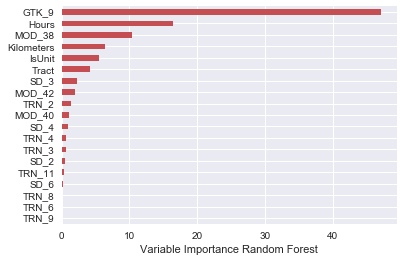

In [71]:
Importance = pd.DataFrame({'Importance':rd_ft.feature_importances_*100}, index=X.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance Random Forest')
plt.gca().legend_ = None

The results indicate that across all of the trees considered in the random
forest, the Gross Ton Kilometers (${\tt GTK_9}$) , the locomotive type (${\tt MOD_38}$) , and the time type (${\tt Hours}$)
are by far the three most important variables.

# Boosting

Now we'll use the ${\tt GradientBoostingRegressor}$ package to fit **boosted
regression trees** to the ${\tt Fuel}$ data set. The
argument ${\tt n_estimators=500}$ indicates that we want 500 trees, and the option
${\tt interaction.depth=4}$ limits the depth of each tree:

In [72]:
boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, max_depth=4, random_state=1)
boost.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=1, subsample=1.0, verbose=0,
             warm_start=False)

53554.539838383265

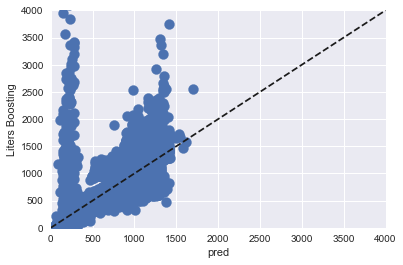

In [73]:
pred = boost.predict(X_test)
plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters Boosting')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [74]:
D_T_boost = len(X_test.columns)
feature_cols_boost = list(X_test.columns)
mean_squared_error(Y_test, boost.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = boost.predict(X_train[feature_cols_boost])
RSS_TRAIN_boost = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_boost = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_boost = len(X_train)   
RSE_TRAIN_boost = ((RSS_TRAIN_boost/(N_TRAIN_boost-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = boost.predict(X_test[feature_cols_boost])
RSS_TEST_boost = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_boost = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_boost = len(X_test)  
RSE_TEST_boost = ((RSS_TEST_boost/(N_TEST_boost-2)) ** 0.5)
   
MSE_TRAIN_boost = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_boost = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_boost = r2_score(Y_train, Y_pred_train) 
R2s_TEST_boost = r2_score(Y_test, Y_pred_test) 


print("Tree boost Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_boost, RSS_TEST_boost))
print("Tree boost Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_boost, TSS_TEST_boost))
print("Tree boost Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_boost*100), (R2s_TEST_boost*100)))   

  
print("Tree boost Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_boost, MSE_TEST_boost))    
print("Tree boost Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_boost, RSE_TEST_boost))    
print("Tree Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} Total Q: {3:6d}".format (D_T_boost,N_TRAIN_boost,N_TEST_boost,N_TRAIN_boost+N_TEST_boost))

Tree boost Training RSS: 3109310192.21 Test RSS: 1590248505.96
Tree boost Training TSS: 13169535785.92 Test TSS: 6560753475.39
Tree boost Training R2s:   76.4% Test R2s:   75.8%
Tree boost Training MSE: 51576.85 Test MSE: 53554.54
Tree boost Training RSE: 227.11 Test RSE: 231.43
Tree Coeffients:     19 Train Q:  60285 Test Q:  29694 Total Q:  89979


Let's check out the feature importances again:

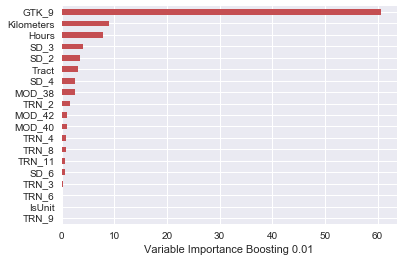

In [75]:
feature_importance = boost.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance Boosting 0.01')
plt.gca().legend_ = None

We see that ${\tt GTK}$, ${\tt Hours}$, ${\tt Kilometers}$ are again the most important variables by far, but the track appears more important than the locomotive model. Now let's use the boosted model to predict ${\tt Liters}$ on the test set:

In [76]:
mean_squared_error(Y_test, boost.predict(X_test))

53554.539838383265

The test MSE obtained is similar to the test MSE for random forests
and superior to that for bagging. If we want to, we can perform boosting
with a different value of the shrinkage parameter $\lambda$. Here we take $\lambda = 0.2$:

In [77]:
boost_s = GradientBoostingRegressor(n_estimators=500, learning_rate=0.2, max_depth=4, random_state=1)
boost_s.fit(X_train, Y_train)
mean_squared_error(Y_test, boost_s.predict(X_test))

52477.288865096933

In this case, using $\lambda = 0.2$ leads to a slightly lower test MSE than $\lambda = 0.01$.

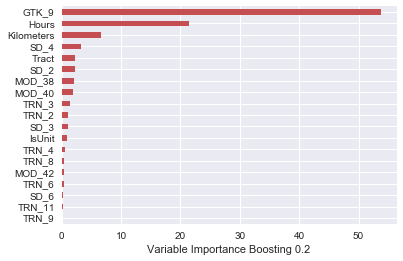

In [78]:
feature_importance = boost_s.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance Boosting 0.2')
plt.gca().legend_ = None

52477.288865096933

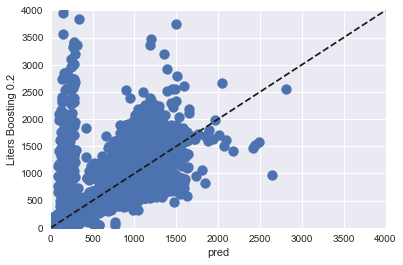

In [79]:
pred = boost_s.predict(X_test)
plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters Boosting 0.2')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [80]:
D_T_boost_s = len(X_test.columns)
feature_cols_boost_s = list(X_test.columns)
mean_squared_error(Y_test, boost_s.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = boost_s.predict(X_train[feature_cols_boost_s])
RSS_TRAIN_boost_s = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_boost_s = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_boost_s = len(X_train)   
RSE_TRAIN_boost_s = ((RSS_TRAIN_boost_s/(N_TRAIN_boost_s-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = boost_s.predict(X_test[feature_cols_boost_s])
RSS_TEST_boost_s = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_boost_s = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_boost_s = len(X_test)  
RSE_TEST_boost_s = ((RSS_TEST_boost_s/(N_TEST_boost_s-2)) ** 0.5)
   
MSE_TRAIN_boost_s = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_boost_s = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_boost_s = r2_score(Y_train, Y_pred_train) 
R2s_TEST_boost_s = r2_score(Y_test, Y_pred_test) 


print("Tree boost_s Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_boost_s, RSS_TEST_boost_s))
print("Tree boost_s Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_boost_s, TSS_TEST_boost_s))
print("Tree boost_s Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_boost_s*100), (R2s_TEST_boost_s*100)))   

  
print("Tree boost_s Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_boost_s, MSE_TEST_boost_s))    
print("Tree boost_s Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_boost_s, RSE_TEST_boost_s))    
print("Tree Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} Total Q: {3:6d}".format (D_T_boost_s,N_TRAIN_boost_s,N_TEST_boost_s,N_TRAIN_boost_s+N_TEST_boost_s))

Tree boost_s Training RSS: 2556066239.13 Test RSS: 1558260615.56
Tree boost_s Training TSS: 13169535785.92 Test TSS: 6560753475.39
Tree boost_s Training R2s:   80.6% Test R2s:   76.2%
Tree boost_s Training MSE: 42399.71 Test MSE: 52477.29
Tree boost_s Training RSE: 205.92 Test RSE: 229.09
Tree Coeffients:     19 Train Q:  60285 Test Q:  29694 Total Q:  89979


In [81]:
# Pruning not supported. Choosing max depth 4)
regr2 = DecisionTreeRegressor(max_depth=4)
regr2.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

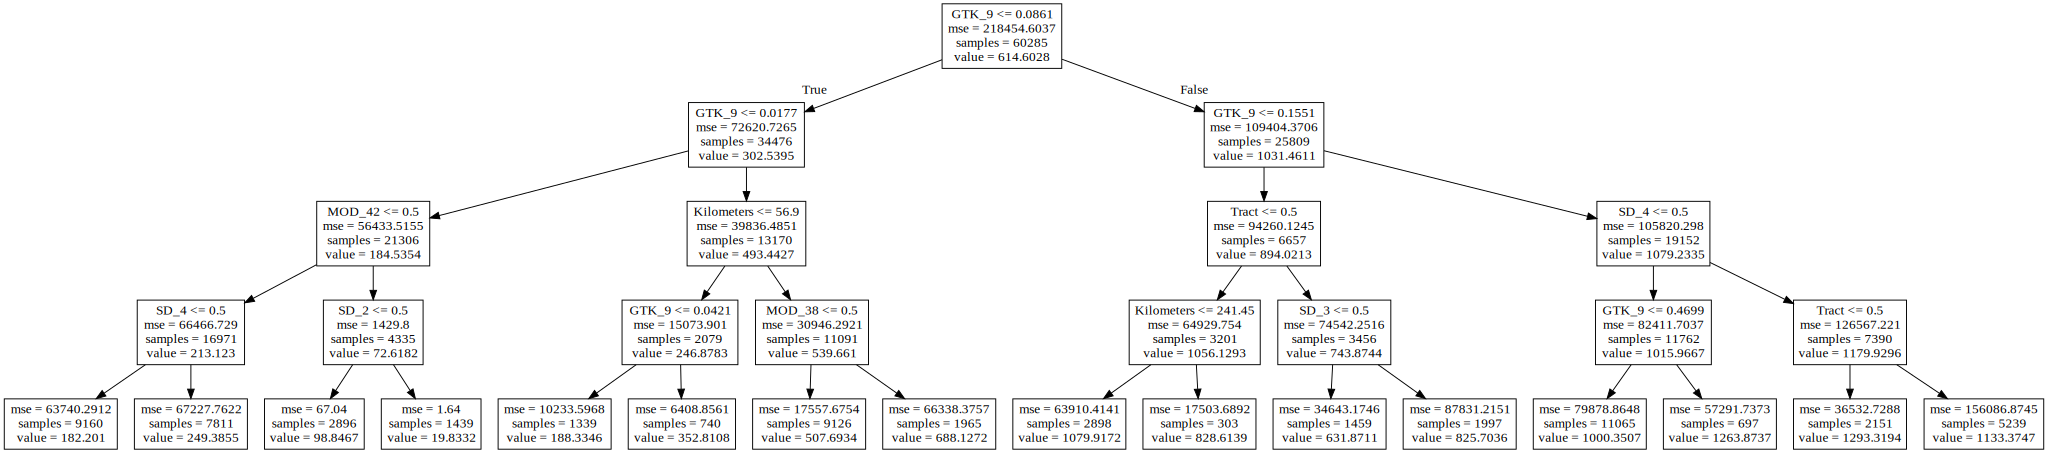

In [82]:
export_graphviz(regr2, out_file="mytree.dot", feature_names=X_train.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

62255.732723035813

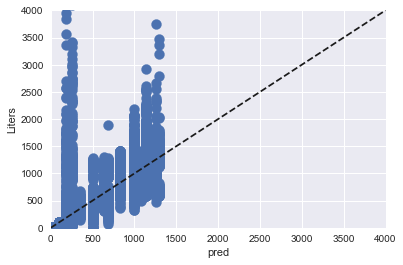

In [83]:
pred = regr2.predict(X_test)

plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [84]:
# Pruning not supported. Choosing max depth 8)
regr3 = DecisionTreeRegressor(max_depth=8)
regr3.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

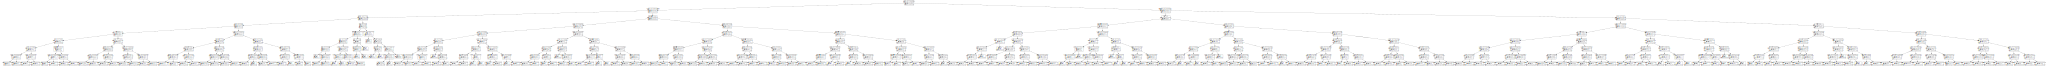

In [85]:
export_graphviz(regr3, out_file="mytree.dot", feature_names=X_train.columns)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

53531.75918668403

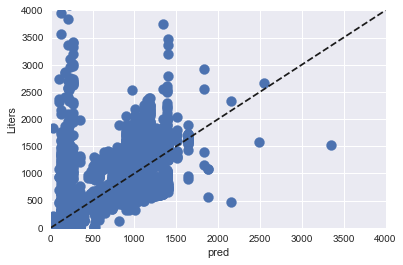

In [86]:
pred = regr3.predict(X_test)

plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

# XGBoosting

Now we'll use the ${\tt XGBRegressor}$ package to fit **Extreme boosted
regression trees** to the ${\tt Fuel}$ data set. The
argument ${\tt n_estimators=500}$ indicates that we want 500 trees, and the option
${\tt interaction.depth=4}$ limits the depth of each tree:

In [87]:
import os

mingw_path = 'C:\Program Files\mingw-w64\x86_64-7.1.0-posix-seh-rt_v5-rev2\mingw64\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [88]:
import xgboost as xgb
from xgboost import XGBRegressor


In [89]:
xgboost1 = XGBRegressor(n_estimators=500, learning_rate=0.2, max_depth=4, random_state=1)
# fit the model with training data
xgboost1.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

52032.555492128369

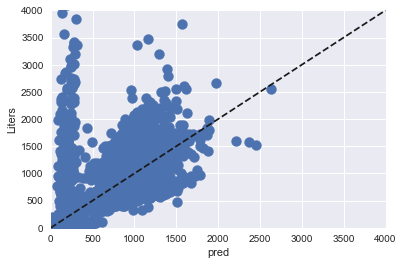

In [90]:
# Make pedictions for test data
pred = xgboost1.predict(X_test)

plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [91]:
D_T_xgboost1 = len(X_test.columns)
feature_cols_xgboost1 = list(X_test.columns)
mean_squared_error(Y_test, xgboost1.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = xgboost1.predict(X_train[feature_cols_xgboost1])
RSS_TRAIN_xgboost1 = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_xgboost1 = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_xgboost1 = len(X_train)   
RSE_TRAIN_xgboost1 = ((RSS_TRAIN_xgboost1/(N_TRAIN_xgboost1-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = xgboost1.predict(X_test[feature_cols_xgboost1])
RSS_TEST_xgboost1 = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_xgboost1 = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_xgboost1 = len(X_test)  
RSE_TEST_xgboost1 = ((RSS_TEST_xgboost1/(N_TEST_xgboost1-2)) ** 0.5)
   
MSE_TRAIN_xgboost1 = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_xgboost1 = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_xgboost1 = r2_score(Y_train, Y_pred_train) 
R2s_TEST_xgboost1 = r2_score(Y_test, Y_pred_test) 


print("Tree xgboost1 Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_xgboost1, RSS_TEST_xgboost1))
print("Tree xgboost1 Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_xgboost1, TSS_TEST_xgboost1))
print("Tree xgboost1 Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_xgboost1*100), (R2s_TEST_xgboost1*100)))   

  
print("Tree xgboost1 Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_xgboost1, MSE_TEST_xgboost1))    
print("Tree xgboost1 Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_xgboost1, RSE_TEST_xgboost1))    
print("Tree Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} Total Q: {3:6d}".format (D_T_xgboost1,N_TRAIN_xgboost1,N_TEST_xgboost1,N_TRAIN_xgboost1+N_TEST_xgboost1))

Tree xgboost1 Training RSS: 2607899904.00 Test RSS: 1545054592.00
Tree xgboost1 Training TSS: 13169535785.92 Test TSS: 6560753475.39
Tree xgboost1 Training R2s:   80.2% Test R2s:   76.5%
Tree xgboost1 Training MSE: 43259.51 Test MSE: 52032.56
Tree xgboost1 Training RSE: 207.99 Test RSE: 228.11
Tree Coeffients:     19 Train Q:  60285 Test Q:  29694 Total Q:  89979


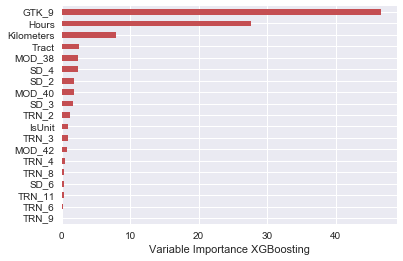

In [92]:
feature_importance = xgboost1.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance XGBoosting')
plt.gca().legend_ = None

In [93]:
xgboost_s = XGBRegressor(
        learning_rate =0.01,
        n_estimators=5000,
        max_depth=7,
        min_child_weight=10,
        gamma=0,
        subsample=0.85,
        colsample_bytree=0.85,
        reg_alpha=10,
        objective= 'reg:linear',
        nthread=4,
        scale_pos_weight=1,
        seed=27)

# fit the model with training data
xgboost_s.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.85, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=7, min_child_weight=10, missing=None,
       n_estimators=5000, n_jobs=1, nthread=4, objective='reg:linear',
       random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.85)

51861.898473492896

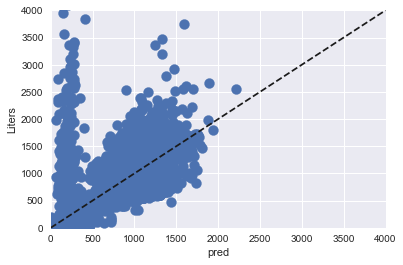

In [94]:
# Make pedictions for test data
pred = xgboost_s.predict(X_test)

plt.scatter(pred, Y_test, label='Liters')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Liters')
plt.xlim( 0, 4000 ) 
plt.ylim( 0, 4000 ) 
mean_squared_error(Y_test, pred)

In [95]:
D_T_xgboost_s = len(X_test.columns)
feature_cols_xgboost_s = list(X_test.columns)
mean_squared_error(Y_test, xgboost_s.predict(X_test))
# We calculate the RSS with respect to the training data
Y_pred_train = xgboost_s.predict(X_train[feature_cols_xgboost_s])
RSS_TRAIN_xgboost_s = ((Y_pred_train - Y_train) ** 2).sum()
TSS_TRAIN_xgboost_s = ((Y_train - Y_train.mean()) ** 2).sum()    
N_TRAIN_xgboost_s = len(X_train)   
RSE_TRAIN_xgboost_s = ((RSS_TRAIN_xgboost_s/(N_TRAIN_xgboost_s-2)) ** 0.5)
# We calculate the RSS with respect to the test data
Y_pred_test = xgboost_s.predict(X_test[feature_cols_xgboost_s])
RSS_TEST_xgboost_s = ((Y_pred_test - Y_test) ** 2).sum()
TSS_TEST_xgboost_s = ((Y_test - Y_test.mean()) ** 2).sum()  
N_TEST_xgboost_s = len(X_test)  
RSE_TEST_xgboost_s = ((RSS_TEST_xgboost_s/(N_TEST_xgboost_s-2)) ** 0.5)
   
MSE_TRAIN_xgboost_s = mean_squared_error(Y_train, Y_pred_train)    
MSE_TEST_xgboost_s = mean_squared_error(Y_test, Y_pred_test)


R2s_TRAIN_xgboost_s = r2_score(Y_train, Y_pred_train) 
R2s_TEST_xgboost_s = r2_score(Y_test, Y_pred_test) 


print("Tree xgboost_s Training RSS: {0:6.2f} Test RSS: {1:6.2f}".format (RSS_TRAIN_xgboost_s, RSS_TEST_xgboost_s))
print("Tree xgboost_s Training TSS: {0:6.2f} Test TSS: {1:6.2f}".format (TSS_TRAIN_xgboost_s, TSS_TEST_xgboost_s))
print("Tree xgboost_s Training R2s: {0:6.1f}% Test R2s: {1:6.1f}%".format ((R2s_TRAIN_xgboost_s*100), (R2s_TEST_xgboost_s*100)))   

  
print("Tree xgboost_s Training MSE: {0:6.2f} Test MSE: {1:6.2f}".format (MSE_TRAIN_xgboost_s, MSE_TEST_xgboost_s))    
print("Tree xgboost_s Training RSE: {0:6.2f} Test RSE: {1:6.2f}".format (RSE_TRAIN_xgboost_s, RSE_TEST_xgboost_s))    
print("Tree Coeffients: {0:6d} Train Q: {1:6d} Test Q: {2:6d} Total Q: {3:6d}".format (D_T_xgboost_s,N_TRAIN_xgboost_s,N_TEST_xgboost_s,N_TRAIN_xgboost_s+N_TEST_xgboost_s))

Tree xgboost_s Training RSS: 2402312448.00 Test RSS: 1539987200.00
Tree xgboost_s Training TSS: 13169535785.92 Test TSS: 6560753475.39
Tree xgboost_s Training R2s:   81.8% Test R2s:   76.5%
Tree xgboost_s Training MSE: 39849.26 Test MSE: 51861.90
Tree xgboost_s Training RSE: 199.63 Test RSE: 227.74
Tree Coeffients:     19 Train Q:  60285 Test Q:  29694 Total Q:  89979


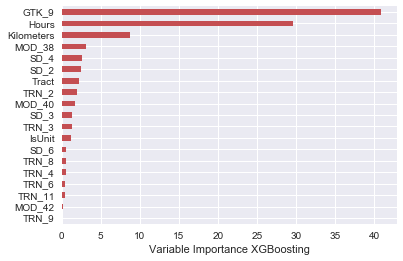

In [96]:
feature_importance = xgboost_s.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance XGBoosting')
plt.gca().legend_ = None

In [97]:
#lm_cols = ["Model", "Coef", "MSE TRAIN", "MSE TEST", "RSS", "TSS", "R2s", "RSE"]
lm_cols = ["Model", "Coef", "MSE TRAIN", "MSE TEST", "R2s", "RSE"]
# Create a DataFrame to store the results of our SE calculations
ml_errors = pd.DataFrame(columns=lm_cols, index=range(1,13))
ml_errors['Model'].astype(str)


# LR Total
ml_errors.set_value(1, 'Model', 'LR Tot')
ml_errors.set_value(1, 'Coef', D_T)
ml_errors.set_value(1, 'MSE TRAIN', MSE_TRAIN_T)
ml_errors.set_value(1, 'MSE TEST', MSE_TEST_T)
#ml_errors.set_value(1, 'RSS', RSS_TEST_T)
#ml_errors.set_value(1, 'TSS', TSS_TEST_T)
ml_errors.set_value(1, 'R2s', (R2s_TEST_T*100))
ml_errors.set_value(1, 'RSE', RSE_TEST_T)

# LR Forward Selection
ml_errors.set_value(2, 'Model', 'LR Fwd')
ml_errors.set_value(2, 'Coef', D_T_F)
ml_errors.set_value(2, 'MSE TRAIN', MSE_TRAIN_F)
ml_errors.set_value(2, 'MSE TEST', MSE_TEST_F)
#ml_errors.set_value(2, 'RSS', RSS_TEST_F)
#ml_errors.set_value(2, 'TSS', TSS_TEST_F)
ml_errors.set_value(2, 'R2s', (R2s_TEST_F*100))
ml_errors.set_value(2, 'RSE', RSE_TEST_F)

# LR Backward Selection
ml_errors.set_value(3, 'Model', 'LR Bwd')
ml_errors.set_value(3, 'Coef', D_T_B)
ml_errors.set_value(3, 'MSE TRAIN', MSE_TRAIN_B)
ml_errors.set_value(3, 'MSE TEST', MSE_TEST_B)
#ml_errors.set_value(3, 'RSS', RSS_TEST_B)
#ml_errors.set_value(3, 'TSS', TSS_TEST_B)
ml_errors.set_value(3, 'R2s', (R2s_TEST_B*100))
ml_errors.set_value(3, 'RSE', RSE_TEST_B)

# LR Cross Validation
ml_errors.set_value(4, 'Model', 'LR CV')
ml_errors.set_value(4, 'Coef', D_T_CV)
ml_errors.set_value(4, 'MSE TRAIN', MSE_TRAIN_CV)
ml_errors.set_value(4, 'MSE TEST', MSE_TEST_CV)
#ml_errors.set_value(4, 'RSS', RSS_TEST_CV)
#ml_errors.set_value(4, 'TSS', TSS_TEST_CV)
ml_errors.set_value(4, 'R2s', (R2s_TEST_CV*100))
ml_errors.set_value(4, 'RSE', RSE_TEST_CV)

# Ridge
ml_errors.set_value(5, 'Model', 'Ridge')
ml_errors.set_value(5, 'Coef', D_T_RDG)
ml_errors.set_value(5, 'MSE TRAIN', MSE_TRAIN_RDG)
ml_errors.set_value(5, 'MSE TEST', MSE_TEST_RDG)
#ml_errors.set_value(5, 'RSS', RSS_TEST_RDG)
#ml_errors.set_value(5, 'TSS', TSS_TEST_RDG)
ml_errors.set_value(5, 'R2s', (R2s_TEST_RDG*100))
ml_errors.set_value(5, 'RSE', RSE_TEST_RDG)

# Lasso
ml_errors.set_value(6, 'Model', 'Lasso')
ml_errors.set_value(6, 'Coef', D_T_LSS)
ml_errors.set_value(6, 'MSE TRAIN', MSE_TRAIN_LSS)
ml_errors.set_value(6, 'MSE TEST', MSE_TEST_LSS)
#ml_errors.set_value(6, 'RSS', RSS_TEST_LSS)
#ml_errors.set_value(6, 'TSS', TSS_TEST_LSS)
ml_errors.set_value(6, 'R2s', (R2s_TEST_LSS*100))
ml_errors.set_value(6, 'RSE', RSE_TEST_LSS)

# Decision Tree Regression
ml_errors.set_value(7, 'Model', 'D Tree')
ml_errors.set_value(7, 'Coef', D_T_dtr)
ml_errors.set_value(7, 'MSE TRAIN', MSE_TRAIN_dtr)
ml_errors.set_value(7, 'MSE TEST', MSE_TEST_dtr)
#ml_errors.set_value(7, 'RSS', RSS_TEST_dtr)
#ml_errors.set_value(7, 'TSS', TSS_TEST_dtr)
ml_errors.set_value(7, 'R2s', (R2s_TEST_dtr*100))
ml_errors.set_value(7, 'RSE', RSE_TEST_dtr)

# Bagging
ml_errors.set_value(8, 'Model', 'Bagging')
ml_errors.set_value(8, 'Coef', D_T_bagging)
ml_errors.set_value(8, 'MSE TRAIN', MSE_TRAIN_bagging)
ml_errors.set_value(8, 'MSE TEST', MSE_TEST_bagging)
#ml_errors.set_value(8, 'RSS', RSS_TEST_bagging)
#ml_errors.set_value(8, 'TSS', TSS_TEST_bagging)
ml_errors.set_value(8, 'R2s', (R2s_TEST_bagging*100))
ml_errors.set_value(8, 'RSE', RSE_TEST_bagging)


# Random Forest
ml_errors.set_value(9, 'Model', 'Random Forest')
ml_errors.set_value(9, 'Coef', D_T_rd_ft)
ml_errors.set_value(9, 'MSE TRAIN', MSE_TRAIN_rd_ft)
ml_errors.set_value(9, 'MSE TEST', MSE_TEST_rd_ft)
#ml_errors.set_value(9, 'RSS', RSS_TEST_rd_ft)
#ml_errors.set_value(9, 'TSS', TSS_TEST_rd_ft)
ml_errors.set_value(9, 'R2s', (R2s_TEST_rd_ft*100))
ml_errors.set_value(9, 'RSE', RSE_TEST_rd_ft)


# Boosting
ml_errors.set_value(10, 'Model', 'Boosting')
ml_errors.set_value(10, 'Coef', D_T_boost)
ml_errors.set_value(10, 'MSE TRAIN', MSE_TRAIN_boost)
ml_errors.set_value(10, 'MSE TEST', MSE_TEST_boost)
#ml_errors.set_value(10, 'RSS', RSS_TEST_boost)
#ml_errors.set_value(10, 'TSS', TSS_TEST_boost)
ml_errors.set_value(10, 'R2s', (R2s_TEST_boost*100))
ml_errors.set_value(10, 'RSE', RSE_TEST_boost)


# Boosting 0.2
ml_errors.set_value(11, 'Model', 'Boosting 0.2')
ml_errors.set_value(11, 'Coef', D_T_boost_s)
ml_errors.set_value(11, 'MSE TRAIN', MSE_TRAIN_boost_s)
ml_errors.set_value(11, 'MSE TEST', MSE_TEST_boost_s)
#ml_errors.set_value(11, 'RSS', RSS_TEST_boost_s)
#ml_errors.set_value(11, 'TSS', TSS_TEST_boost_s)
ml_errors.set_value(11, 'R2s', (R2s_TEST_boost_s*100))
ml_errors.set_value(11, 'RSE', RSE_TEST_boost_s)

# Extreme Gradient Boosting
ml_errors.set_value(12, 'Model', 'XGBoosting')
ml_errors.set_value(12, 'Coef', D_T_xgboost1)
ml_errors.set_value(12, 'MSE TRAIN', MSE_TRAIN_xgboost1)
ml_errors.set_value(12, 'MSE TEST', MSE_TEST_xgboost1)
#ml_errors.set_value(12, 'RSS', RSS_TEST_xgboost1)
#ml_errors.set_value(12, 'TSS', TSS_TEST_xgboost1)
ml_errors.set_value(12, 'R2s', (R2s_TEST_xgboost1*100))
ml_errors.set_value(12, 'RSE', RSE_TEST_xgboost1)


# Extreme Gradient Boosting Tuning Parameters
ml_errors.set_value(13, 'Model', 'XGBoosting tp')
ml_errors.set_value(13, 'Coef', D_T_xgboost_s)
ml_errors.set_value(13, 'MSE TRAIN', MSE_TRAIN_xgboost_s)
ml_errors.set_value(13, 'MSE TEST', MSE_TEST_xgboost_s)
#ml_errors.set_value(13, 'RSS', RSS_TEST_xgboost_s)
#ml_errors.set_value(13, 'TSS', TSS_TEST_xgboost_s)
ml_errors.set_value(13, 'R2s', (R2s_TEST_xgboost_s*100))
ml_errors.set_value(13, 'RSE', RSE_TEST_xgboost_s)


ml_errors['Coef'] = ml_errors['Coef'].map('{:,.0f}'.format)
ml_errors['MSE TRAIN'] = ml_errors['MSE TRAIN'].map('{:,.0f}'.format)
ml_errors['MSE TEST'] = ml_errors['MSE TEST'].map('{:,.0f}'.format)
#ml_errors['RSS'] = ml_errors['RSS'].map('{:,.0f}'.format)
#ml_errors['TSS'] = ml_errors['TSS'].map('{:,.0f}'.format)
ml_errors['R2s'] = ml_errors['R2s'].map('{:,.2f}%'.format)
ml_errors['RSE'] = ml_errors['RSE'].map('{:,.2f}'.format)

ml_errors['Coef'] = ml_errors['Coef'].fillna(0)
ml_errors = ml_errors.fillna(0)
ml_errors.head(13)

,Model,Coef,MSE TRAIN,MSE TEST,R2s,RSE
1,LR Tot,19,"66,755","68,509",68.99%,261.75
2,LR Fwd,19,"66,759","68,517",68.99%,261.77
3,LR Bwd,18,"66,807","68,528",68.98%,261.79
4,LR CV,19,"66,762","68,516",68.99%,261.76
5,Ridge,19,"66,835","68,442",69.02%,261.62
6,Lasso,18,"66,762","68,506",68.99%,261.74
7,D Tree,19,"72,674","74,380",66.34%,272.74
8,Bagging,19,"21,229","60,659",72.55%,246.30
9,Random Forest,19,"21,169","59,831",72.92%,244.61
10,Boosting,19,"51,577","53,555",75.76%,231.43
